In [1]:
import pandas as pd          
import numpy as np          
import matplotlib.pyplot as plt  
import yfinance as yf       
%matplotlib inline
import warnings                   
warnings.filterwarnings("ignore")

In [2]:
# let us get some data. One thing to be careful about data is that  for reliability model should use similar condition data for example
#I cannot use a model trained on crisis data to predict normal market scenario stats. Let us begin after end of 2008 crisisdf=yf.download("RELIANCE.NS",,start="2011-01-01")
df=yf.download("SPY",start="2011-01-01")
df['returns']=df.Close.pct_change()
df['returns']=np.log1p(df['returns'])*100 # converting into continuously compounded returns in %
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2011-01-03,126.709999,127.599998,125.699997,127.050003,99.999397,138725200,NaN
2011-01-04,127.330002,127.370003,126.190002,126.980003,99.944305,137409700,-0.055111
2011-01-05,126.580002,127.720001,126.459999,127.639999,100.463783,133975300,0.518418
2011-01-06,127.690002,127.830002,127.010002,127.389999,100.267021,122519000,-0.196055
2011-01-07,127.559998,127.769997,126.150002,127.139999,100.070244,156034600,-0.196441


In [3]:
df.fillna(method='bfill',inplace=True)
df.head()    #cleaning data

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2011-01-03,126.709999,127.599998,125.699997,127.050003,99.999397,138725200,-0.055111
2011-01-04,127.330002,127.370003,126.190002,126.980003,99.944305,137409700,-0.055111
2011-01-05,126.580002,127.720001,126.459999,127.639999,100.463783,133975300,0.518418
2011-01-06,127.690002,127.830002,127.010002,127.389999,100.267021,122519000,-0.196055
2011-01-07,127.559998,127.769997,126.150002,127.139999,100.070244,156034600,-0.196441


In [4]:
df.index # already in DatetimeIndex form if not we could
#use df.index=pd.to_datetime(df.index)

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2023-09-21', '2023-09-22', '2023-09-25', '2023-09-26',
               '2023-09-27', '2023-09-28', '2023-09-29', '2023-10-02',
               '2023-10-03', '2023-10-04'],
              dtype='datetime64[ns]', name='Date', length=3210, freq=None)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

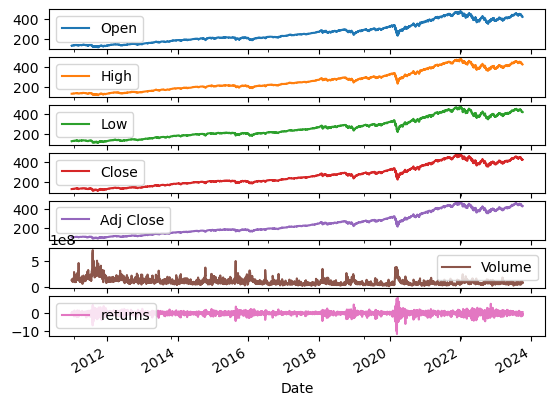

In [5]:
df.plot(subplots=True)

In [6]:
# returns looking very congested resampling it to downscale intomonthly data
df_monthly=df.resample("MS").mean() 

https://stackoverflow.com/questions/54840047/attributeerror-datetimeindexresampler-object-has-no-attribute-rolling

In [7]:
df_monthly.loc[df_monthly.index[0]:df_monthly.index[5]]

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2011-01-01,128.240001,128.730000,127.545000,128.270501,100.960041,1.430157e+08,0.060984
2011-02-01,131.972633,132.689473,131.489475,132.301580,104.132852,1.484249e+08,0.179724
2011-03-01,130.706087,131.420000,129.862175,130.641304,103.020349,2.081504e+08,-0.018324
2011-04-01,133.137000,133.661999,132.567501,133.193500,105.290289,1.406359e+08,0.142750
2011-05-01,134.124286,134.756190,133.345713,134.074284,105.986557,1.589337e+08,-0.053704
2011-06-01,129.041818,129.815454,128.222274,128.954545,102.168855,2.141106e+08,-0.099814


<Axes: xlabel='Date'>

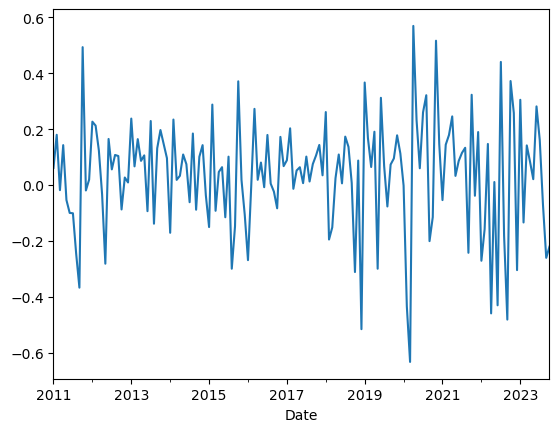

In [8]:
df=df_monthly
df_monthly["returns"].plot()

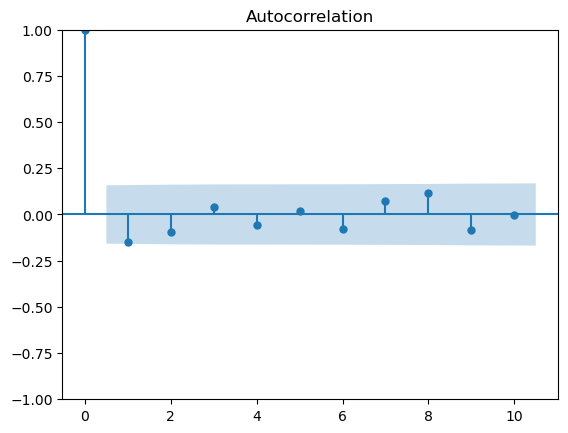

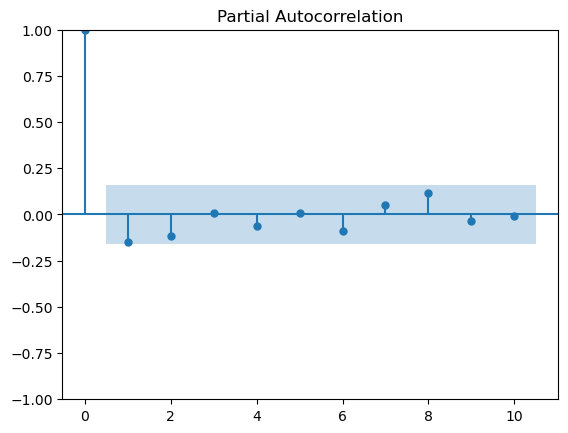

In [9]:
# from first look it looks like some seasonility is there but we will analyze that later
# lets us look at acf and pacf first
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df["returns"],lags=10)
plot_pacf(df["returns"],lags=10)
plt.show()



# Augmented dickey fuller test
A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. In adf test the null hypothesis is that data is non stationary. If p value is smaller than our confidence level we may reject null hypothesis and
conclude that data is in fact stationary.So p value should be small.

In [10]:

from statsmodels.tsa.stattools import adfuller
result = adfuller(df['returns'])
print('Test Stat: {}\np value: {}'.format(result[0], result[1]))

Test Stat: -10.335687835195493
p value: 2.7678705775289026e-18


In [11]:
# building arma models now
from statsmodels.tsa.arima.model import ARIMA
df.index = pd.DatetimeIndex(df.index).to_period('D')
model_ma1=ARIMA(df['returns'],order=(0,0,2))
ma1_results=model_ma1.fit()
ma1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                  154
Model:                 ARIMA(0, 0, 2)   Log Likelihood                  31.067
Date:                Thu, 05 Oct 2023   AIC                            -54.134
Time:                        13:39:19   BIC                            -41.986
Sample:                    01-01-2011   HQIC                           -49.199
                         - 10-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0371      0.014      2.560      0.010       0.009       0.065
ma.L1         -0.1687      0.066     -2.542      0.011      -0.299      -0.039
ma.L2         -0.1041      0.072     -1.441      0.150      -0.246       0.038
sigma2         0.0391      0.004      9.526      0.000       0.031       0.047
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                36.33
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.82   Skew:                            -0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
# but we might have overfitted our model so better to split it into training and test data
from sklearn.model_selection import train_test_split
train,test=train_test_split(df['returns'],test_size=0.2,shuffle=False)
model_ma2=ARIMA(train,order=(0,0,2))
ma2_results=model_ma2.fit()
ma2_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                  123
Model:                 ARIMA(0, 0, 2)   Log Likelihood                  35.355
Date:                Thu, 05 Oct 2023   AIC                            -62.710
Time:                        13:39:20   BIC                            -51.461
Sample:                    01-01-2011   HQIC                           -58.141
                         - 03-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0439      0.013      3.428      0.001       0.019       0.069
ma.L1         -0.1506      0.071     -2.121      0.034      -0.290      -0.011
ma.L2         -0.2170      0.097     -2.244      0.025      -0.407      -0.027
sigma2         0.0329      0.003      9.835      0.000       0.026       0.039
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                65.49
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -1.16
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

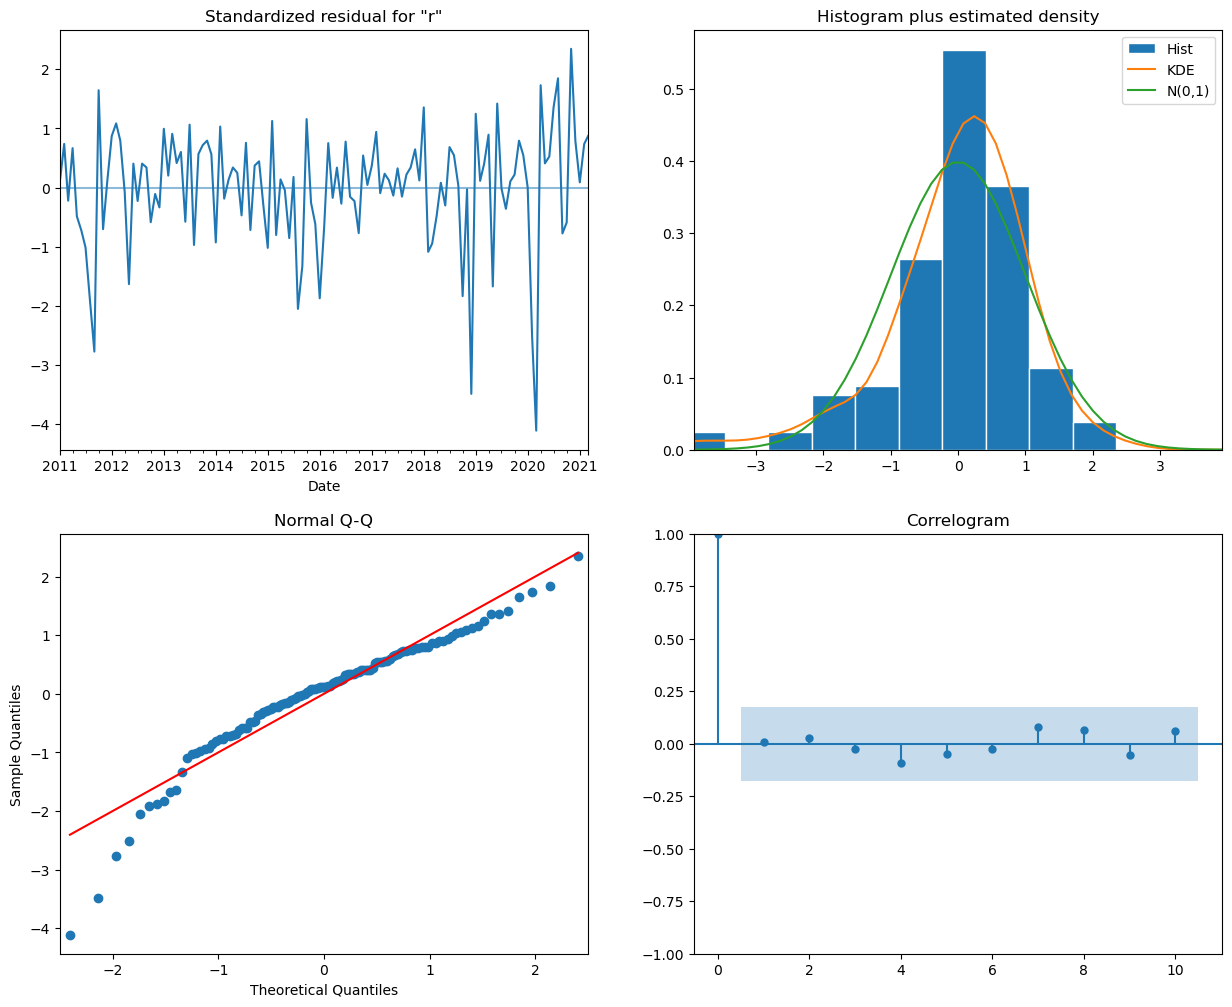

In [13]:
ma2_results.plot_diagnostics(figsize=(15, 12))
plt.show() # shows behavior of residuals over time it should be ensured that residuals resemble white noise

In [14]:
# now predicting test data values with it
start = len(train) 
end = len(train) + len(test) - 1
start



123

In [15]:
#let us plot the results

predictions=ma2_results.predict(start,end)
#predictions=pd.DataFrame(predictions,index=test.index,columns=['Prediction'])


pred=pd.DataFrame(predictions)
pred.set_index(test.index,inplace=True)
pred.rename(columns={"predicted_mean":"prediction"},inplace=True)
pred


,prediction
Date,
2021-04-01,-0.008989
2021-05-01,0.009528
2021-06-01,0.043933
2021-07-01,0.043933
2021-08-01,0.043933
2021-09-01,0.043933
2021-10-01,0.043933
2021-11-01,0.043933
2021-12-01,0.043933


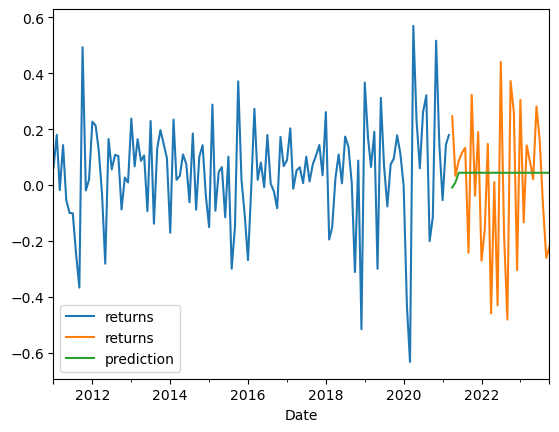

In [23]:
train.plot(legend=True)
test.plot(legend=True)
pred['prediction'].plot(legend=True)
plt.show()


In [17]:
from prophet import Prophet

In [18]:
my_model = Prophet(interval_width=0.95)



In [19]:
k=range(0,3)
k[-1]

2

In [20]:
ma1_results.predict()

Date
2011-01-01    0.037054
2011-02-01    0.033573
2011-03-01    0.010763
2011-04-01    0.026979
2011-05-01    0.020561
                ...   
2023-06-01    0.031729
2023-07-01   -0.005327
2023-08-01   -0.017010
2023-09-01    0.028881
2023-10-01    0.091546
Freq: D, Name: predicted_mean, Length: 154, dtype: float64

In [21]:
ma1_results